## IST652_Analysis of Citywide Payroll Data in NYC
### Team 12: Ryan Austin Yon, Yunhan Zhang 

---

### Data Set

In [1]:
# EXECUTE THIS CELL to setup the modules
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
# Defining location of dataset
filepath = "~/datasets/ist652/Fall2022/Team12/Citywide_Payroll_Data__Fiscal_Year_.zip"

In [3]:
# EXECUTE THIS CELL to load the dataset into your environment - THIS WILL TAKE ABOUT A MINUTE - be patient
# a security warning will appear. You can ignore it.
payroll_data = pd.read_csv(filepath)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
payroll_data.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [5]:
 payroll_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109775 entries, 0 to 5109774
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 662.7+ MB


Text(0.5, 1.01, 'Payroll Data Pair Plot')

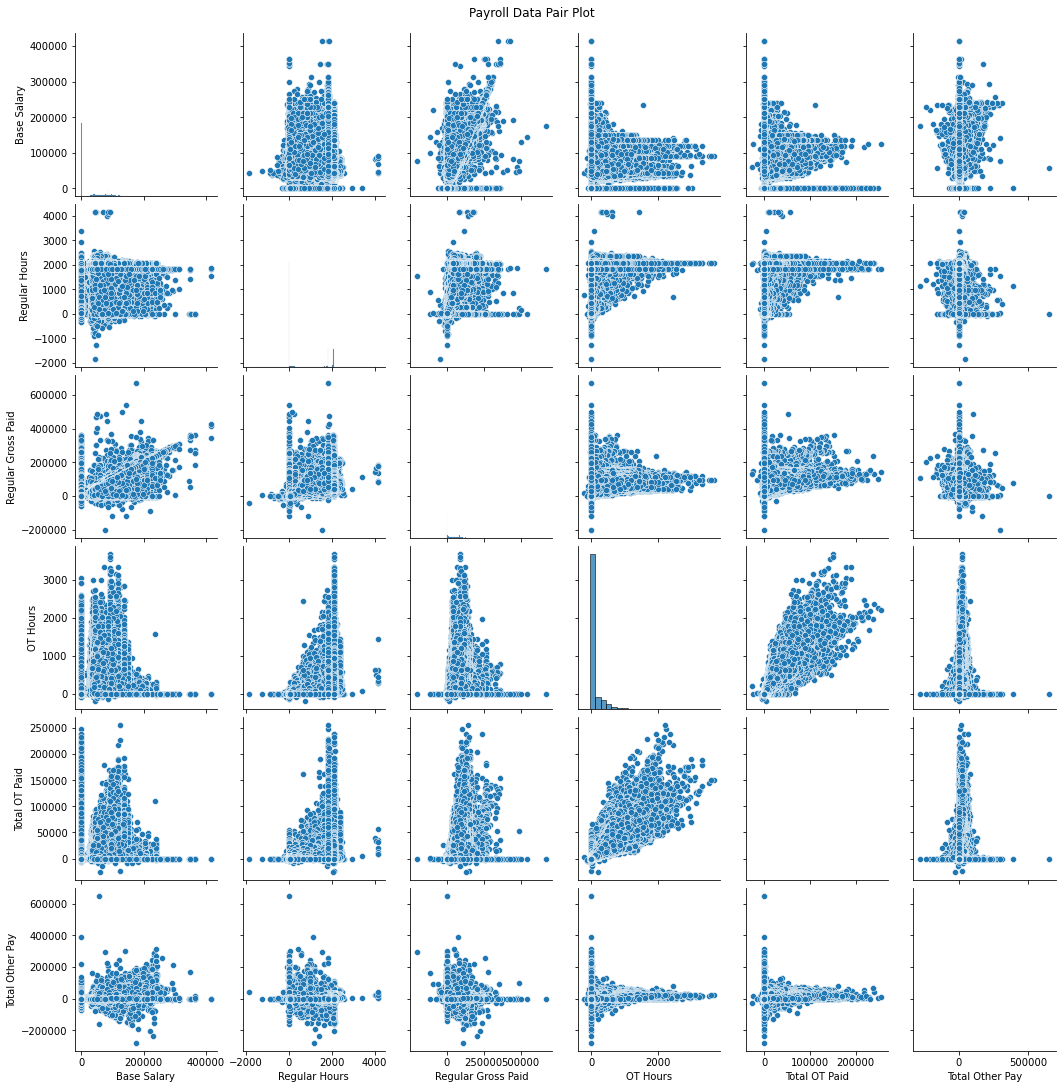

In [6]:
import seaborn as sns
ax = sns.pairplot(payroll_data.drop(['Fiscal Year', 'Payroll Number'], axis = 1))
ax.fig.suptitle("Payroll Data Pair Plot", y=1.01)

---

### Data Cleaning

In [7]:
# Counting missing values across entire dataframe
payroll_data.isna().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                       12830
First Name                      12871
Mid Init                      2093578
Agency Start Date                  63
Work Location Borough          506232
Title Description                  93
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

In [8]:
# Changing missing values in Work Location Borough and Title Description into “Unknown”.
payroll_data['Work Location Borough'] = payroll_data['Work Location Borough'].fillna('Unknown')
payroll_data['Title Description'] = payroll_data['Title Description'].fillna('Unknown')

In [9]:
# Transforming columns of Agency Name, Work Location Borough, and Title Description into types of string.
payroll_data['Agency Name'] = payroll_data['Agency Name'].astype(str)
payroll_data['Work Location Borough'] = payroll_data['Work Location Borough'].astype(str)
payroll_data['Title Description'] = payroll_data['Title Description'].astype(str)

In [10]:
# Transforming column of Agency Name, Work Location Borough, and Title Description into lower case.
payroll_data['Agency Name'] = payroll_data['Agency Name'].str.lower()
payroll_data['Work Location Borough'] = payroll_data['Work Location Borough'].str.lower()
payroll_data['Title Description'] = payroll_data['Title Description'].str.lower()

---

### Analyzing Data

#### 1. Trend change in base salary over years

In [11]:
payroll_data_y_base = payroll_data.groupby('Fiscal Year')['Base Salary'].median()
payroll_data_y_base

Fiscal Year
2014    36602.0
2015    36928.0
2016    41824.0
2017    41214.0
2018    43457.0
2019    42799.0
2020    44930.0
2021    46066.0
2022    45212.0
Name: Base Salary, dtype: float64

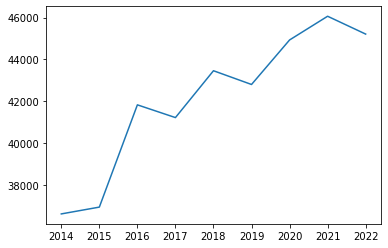

In [12]:
# Visualization the results
import matplotlib.pyplot as plt

x = payroll_data_y_base.index
y = list(payroll_data_y_base)
plt.plot(x,y)

**Insights:** This plot shows that the base salary overall goes up since 2014. However, as we pay attention to recent years (2021-2022), it has a trend of going down. After we reviewed some news and reports in the past few years, we found that the COVID-19 pandemic did not affect people's base salary that much. This might be related to the relevant decrees issued by the government during the COVID-19 pandemic.

#### 2. Trend change in average overtime pay over years

In [13]:
payroll_data_y_oth = payroll_data.groupby('Fiscal Year')['OT Hours'].mean()
payroll_data_y_oth

Fiscal Year
2014    58.408411
2015    56.768090
2016    61.450874
2017    60.129853
2018    60.506053
2019    55.435181
2020    70.784212
2021    63.790763
2022    77.912620
Name: OT Hours, dtype: float64

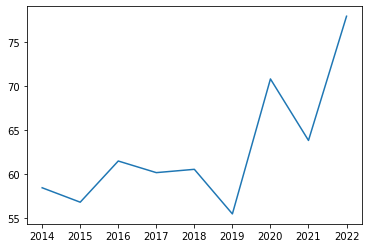

In [14]:
# Visualization the results
x = payroll_data_y_oth.index
y = list(payroll_data_y_oth)
plt.plot(x,y)

**Insights:** This plot shows that the total overtime was stable before COVID-19 pandemic (2014-2018). And the total overtime surge to a high level after COVID-19 pandemic (2019-2020). It went down a little from 2020 to 2021 and went up to high again from 2021 to 2022. Our guess is the agencies in this dataset may require over time during the COVID-19 pandemic.

**3. Jobs that have the most base salary from 2014 to 2018**

In [15]:
payroll_data_job_titles_14_18 = payroll_data[payroll_data['Fiscal Year'].between(2014,2018)]
payroll_data_14_18 = payroll_data_job_titles_14_18.loc[payroll_data_job_titles_14_18['Title Description']!= 'Unknown']
payroll_data_14_18 = payroll_data_14_18.groupby('Title Description')['Base Salary'].median()
payroll_data_14_18_top8 = payroll_data_14_18[0:8]
payroll_data_14_18_top8

Title Description
* attending dentist                 115771.0
*adm dir fleet maint-mgrl asgmnt    118034.0
*adm dir fleet maintenance - nm     129158.0
*adm school security manager-u       82309.5
*admin schl secur mgr-mgl           143850.0
*administrative attorney            146111.0
*agency attorney                    106003.0
*asist systms analyst                60163.0
Name: Base Salary, dtype: float64

In [16]:
# Visualization the results
payroll_data_14_18_top8_ascend = payroll_data_14_18_top8.sort_values(ascending=True)

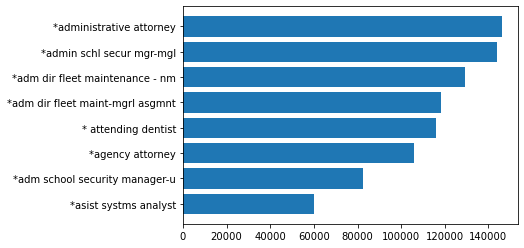

In [17]:
x = payroll_data_14_18_top8_ascend.index
y = list(payroll_data_14_18_top8_ascend)
fig, ax = plt.subplots()
ax.barh(x, y)
plt.show()

**4. Jobs that have the most base salary from 2019 to 2021**

In [18]:
payroll_data_job_titles_19_21 = payroll_data[payroll_data['Fiscal Year'].between(2019,2022)]
payroll_data_19_21 = payroll_data_job_titles_19_21.loc[payroll_data_job_titles_19_21['Title Description']!= 'Unknown']
payroll_data_19_21 = payroll_data_19_21.groupby('Title Description')['Base Salary'].median()
payroll_data_19_21_top8 = payroll_data_19_21[0:8]
payroll_data_19_21_top8

Title Description
*adm school security manager-u     85725.0
*admin schl secur mgr-mgl         185587.0
*administrative attorney          156958.0
*agency attorney                  125681.0
*asist systms analyst              73482.0
*assist coordinating manager       54673.0
*assistant advocate-pd            105694.0
*associate education officer       96672.0
Name: Base Salary, dtype: float64

In [19]:
# Visualization the results
payroll_data_19_21_top8_ascend = payroll_data_19_21_top8.sort_values(ascending=True)

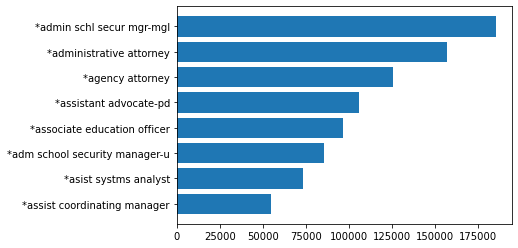

In [20]:
x = payroll_data_19_21_top8_ascend.index
y = list(payroll_data_19_21_top8_ascend)
fig, ax = plt.subplots()
ax.barh(x, y)
plt.show()

**Insights:** By camparing both bar plots, we can see how top8 job titles with highest base salary shiftted before (2014-2018) and after (2019-2022) the COVID-19 pandemic. Jobs like School Safety Admin has gone up by a lot; Hardcore jobs like attorney still hold up their places in the top3.

**5. Base Salary in different borough**

In [21]:
payroll_data_boro = payroll_data.groupby('Work Location Borough')['Base Salary'].median()
payroll_data_boro

Work Location Borough
albany            74247.50
bronx             48712.00
brooklyn          50957.00
delaware          60156.00
dutchess          60017.00
greene            60138.00
manhattan         32426.00
nassau               66.93
orange            54569.50
other            108811.00
putnam            60076.00
queens            52649.00
richmond          57206.00
schoharie         64397.00
sullivan          62776.00
ulster            69740.00
unknown           36423.00
washington dc    128909.00
westchester       64397.00
Name: Base Salary, dtype: float64

In [22]:
# Visualization the results
payroll_data_boro_ascend = payroll_data_boro.sort_values(ascending=False)
payroll_data_boro_top5 = payroll_data_boro_ascend[0:5]
payroll_data_boro_top5 = pd.DataFrame(payroll_data_boro_top5)

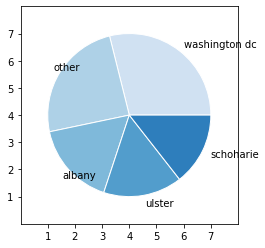

In [23]:
x = list(payroll_data_boro_top5['Base Salary'])
labels = payroll_data_boro_top5.index
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
fig, ax = plt.subplots()
ax.pie(x, labels=labels, colors=colors, radius=3, center=(4, 4),wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

**6. Trend of Base Salary in different borough**

In [24]:
payroll_data_boro_year = payroll_data.groupby(['Work Location Borough','Fiscal Year'])['Base Salary'].median()
payroll_data_boro_year_count = payroll_data_boro_year.unstack('Work Location Borough')
payroll_data_boro_year_count = pd.DataFrame(payroll_data_boro_year_count)

In [25]:
payroll_data_boro_year_count_top5 = payroll_data_boro_year_count[['washington dc', 'ulster','albany','schoharie','other']]

<AxesSubplot:title={'center':'Trend Change of Base Salary in different borough'}, xlabel='Fiscal Year'>

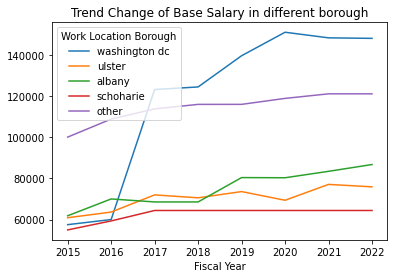

In [26]:
# Visualization of the result:
payroll_data_boro_year_count_top5.plot(title="Trend Change of Base Salary in different borough")

**Insights:** From the pie chart, we noticed that Washington DC is the borough which has the highest base salary in New York City. And from the line chart below, we found that Washinton DC has a very high jump since year 2016. And always leads the place than other boroughs. Regards to the other 4 boroughs, seems like there were no major upwards and downwards from 2015 to 2022.

**7. Base Salary in different Agencies**

In [27]:
payroll_data_agency = payroll_data.groupby('Agency Name')['Base Salary'].median()
payroll_data_agency

Agency Name
admin for children's svcs        59480.00
admin trials and hearings           57.99
board of correction              70497.00
board of corrections             59441.00
board of election                33220.00
                                   ...   
staten island community bd #2       30.22
staten island community bd #3    64718.50
tax commission                   80319.00
taxi & limousine commission      46119.00
teachers retirement system       64963.00
Name: Base Salary, Length: 165, dtype: float64

In [28]:
# Visualization the results
payroll_data_agency_ascend = payroll_data_agency.sort_values(ascending=False)
payroll_data_agency_top5 = payroll_data_agency_ascend[0:5]
payroll_data_agency_top5 = pd.DataFrame(payroll_data_agency_top5)

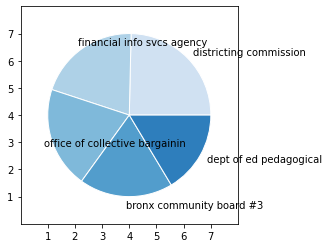

In [29]:
x = list(payroll_data_agency_top5['Base Salary'])
labels = payroll_data_agency_top5.index
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
fig, ax = plt.subplots()
ax.pie(x, labels=labels, colors=colors, radius=3, center=(4, 4),wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()

**8. Trend of Base Salary in different Agencies**

In [30]:
payroll_data_agency_year = payroll_data.groupby(['Agency Name','Fiscal Year'])['Base Salary'].median()
payroll_data_agency_year_count = payroll_data_agency_year.unstack('Agency Name')
payroll_data_agency_year_count = pd.DataFrame(payroll_data_agency_year_count)

In [31]:
payroll_data_agency_year_count_top5 = payroll_data_agency_year_count[['financial info svcs agency', 'districting commission','dept of ed pedagogical','bronx community board #3','office of collective bargainin']]

<AxesSubplot:title={'center':'Trend Change of Base Salary in different Agency'}, xlabel='Fiscal Year'>

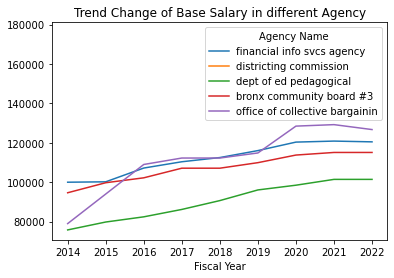

In [32]:
# Visualization of the result:
payroll_data_agency_year_count_top5.plot(title="Trend Change of Base Salary in different Agency")

**Insights:** From the pie chart, we can see that top5 agencies which have the most base salary have almost the same amount of base salary from 2014 to 2022. However Districting Commission is the highest. And from the line chart, we found that the overall trend keeps going up from 2014 to 2022; however no major bump among top5 agencies. Good thing is the COVID-19 pandemic didn't affact these agencies by a lot in regards of base salary they assigned to employees.

**9. OverTime Hours among different Agencies**

In [33]:
payroll_data_agency_ot = payroll_data.groupby('Agency Name')['OT Hours'].mean()
payroll_data_agency_ot_ascend = payroll_data_agency_ot.sort_values(ascending=False)
payroll_data_agency_ot_ascend_top8 = payroll_data_agency_ot_ascend[0:8]

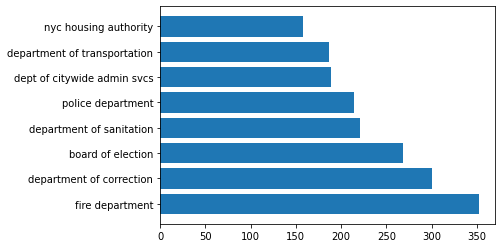

In [34]:
# Visualization the results
x = payroll_data_agency_ot_ascend_top8.index
y = list(payroll_data_agency_ot_ascend_top8)
fig, ax = plt.subplots()
ax.barh(x, y)
plt.show()

**10. Trend of OverTime Hours among different Agency**

In [35]:
payroll_data_ot_year = payroll_data.groupby(['Agency Name','Fiscal Year'])['OT Hours'].mean()
payroll_data_ot_year_count = payroll_data_ot_year.unstack('Agency Name')
payroll_data_ot_year_count = pd.DataFrame(payroll_data_ot_year_count)
payroll_data_ot_year_count.head()

Agency Name,admin for children's svcs,admin trials and hearings,board of correction,board of corrections,board of election,board of election poll workers,borough president-bronx,borough president-brooklyn,borough president-queens,borough president-staten is,...,queens community board #9,queens da,richmond da,spec narcs-da,staten island community bd #1,staten island community bd #2,staten island community bd #3,tax commission,taxi & limousine commission,teachers retirement system
Fiscal Year,,,,,,,,,,,,,,,,,,,,,
2014,102.384335,5.904668,NaN,0.235294,248.010545,0.0,7.941667,7.356322,0.876712,0.0,...,0.0,35.418561,24.283482,6.157371,0.0,0.0,0.0,48.596939,71.846512,15.989684
2015,95.038892,1.712759,0.000000,NaN,106.946519,0.0,13.393939,9.280952,0.000000,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,60.012500,57.976343,8.309890
2016,119.329520,1.959564,0.195652,NaN,249.786088,0.0,13.570312,5.289474,0.000000,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,47.815574,38.299362,8.988527
2017,152.831746,1.943713,0.000000,NaN,307.164253,0.0,10.560345,5.750000,0.552239,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,47.415254,44.863791,11.870732
2018,175.238263,2.830070,0.227941,NaN,229.639587,0.0,13.173276,4.631757,0.000000,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,35.445312,45.795267,13.742299


In [36]:
payroll_data_ot_year_count_top5 = payroll_data_ot_year_count[['police department','department of sanitation','board of election','department of correction','fire department']]

<AxesSubplot:title={'center':'Trend Change of OverTime Hours in different Agency'}, xlabel='Fiscal Year'>

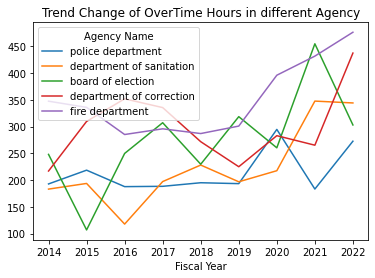

In [37]:
# Visualization of the result:
payroll_data_ot_year_count_top5.plot(title="Trend Change of OverTime Hours in different Agency")

**Insights:** From the pie chart above, we noticed that the Fire Department has the highest amount of overtime hours which does not surprise us. However, when by looking at the line chart above, we noticed that most of these agencies' overtime hours went up after the outbreak of COVID-19 in 2019. Especially for the Police Department, the overtime hours went up by lot in 2019. On the other hand, we notice that the Board of Election also had higher overtime hours over years. The reason behind this may because the election of President of United States.